<a href="https://colab.research.google.com/github/EldritchBear/ADA-Informes/blob/main/Insertion_Sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de Ordenamiento

Los problemas de ordenamiento a pesar de que son de planteamiento facil presentan un nivel de complejidad notable y muchas personas han sido atraidas a tratar con este reto, resultando en varios algoritmos de ordenamiento siendo diseñados y cada uno siendo más eficiente que otros.

Entrada: Recibe un arreglo de tamaño n con números

Salida: Retorna el arreglo ordenado, ya sea de menor a mayor o al revéz.

# 2. Insertion Sort

El insertion sort es un algoritmo de ordenamiento que generalmente es utilizado para ordenar de menor a mayor pero tambien puede ser utilizado al inverso.

Este recibe un arreglo o lista de datos asumiendo que el primer dato ya está ordenado. Este dato se compara con el dato siguiente a este preguntando si es mayor o menor, en caso que el dato siguiente sea menor al dato actual se intercambian y se verifica si el dato nuevo cambiado es mayor al dato anterior a este, si es menor se vuelve a intercambiar hasta que esten ordenadas. El codigo va a realizar estas comprobaciones hasta llegar al último dato y se verifique que este es el mayor, para luego retornar estos datos de forma ordenada.

# 2.1 Implementación del codigo




In [111]:
def insertionSort(arreglo, verbose):
  cont = 0
  comparaciones = 0
  n = len(arreglo)
  
  for i in range(0,n):
    dato = arreglo[i]
    if (i > 0 and arreglo[i-1] > dato and verbose == True):
      cont = cont + 1
      print("\nRevisión ",cont)
    while (i > 0 and arreglo[i-1] > dato):
      comparaciones = comparaciones + 1
      arreglo[i] = arreglo[i-1]
      i = i - 1
      arreglo[i] = dato
      if (verbose == True):
        print(arreglo)
  return (arreglo,comparaciones)

In [114]:
arreglo = [1,6,8,5,7]
verbose = False
print("Entrada:",arreglo)
arreglo,comparaciones = insertionSort(arreglo,verbose)
print("Salida:",arreglo)
print("comparaciones:",comparaciones)

Entrada: [1, 6, 8, 5, 7]
Salida: [1, 5, 6, 7, 8]
comparaciones: 3


# 2.2 Ejecución del codigo paso a paso

In [115]:
arreglo = [1,6,8,5,7]
verbose = True
print("Entrada:",arreglo)
arreglo,comparaciones = insertionSort(arreglo,verbose)
print("\nSalida",arreglo)
print("comparaciones:",comparaciones)

Entrada: [1, 6, 8, 5, 7]

Revisión  1
[1, 6, 5, 8, 7]
[1, 5, 6, 8, 7]

Revisión  2
[1, 5, 6, 7, 8]

Salida [1, 5, 6, 7, 8]
comparaciones: 3


# 3. Tiempo de ejecución

El insertion sort tiene complejidad temporal $O(n^2)$ tanto en el caso promedio como en el peor caso, esto es debido a que se debe recorrer todo el arreglo realizando comparaciones sobre si un número es menor al otro, en caso de que el número siguiente sea menor se deben intercambiar y luego comprobar si es que ahora se encuentra en su posición correcta comprobando si es mayor al número anterior, puede ocurrir que se tenga que mover varias veces un número hasta que quede ordenado antes de continuar.

###Ejemplo con el peor caso:



In [113]:
arreglo = [4,3,5,6,2]
verbose = True
comparaciones = 0
print("Entrada:",arreglo)
arreglo, comparaciones = insertionSort(arreglo,verbose)
print("\nSalida",arreglo)
print("Se han hecho ",comparaciones," comparaciones") 

Entrada: [4, 3, 5, 6, 2]

Revisión  1
[3, 4, 5, 6, 2]

Revisión  2
[3, 4, 5, 2, 6]
[3, 4, 2, 5, 6]
[3, 2, 4, 5, 6]
[2, 3, 4, 5, 6]

Salida [2, 3, 4, 5, 6]
Se han hecho  5  comparaciones


En la revisión 1 debido a que son los primeros 2 números del arreglo solamente se intercambian y no se hace una comprobación extra, siendo la comprobación 1.

En la revisión 2 se intercambia el último y el penúltimo número, luego de esto se comprueba si la posición del número recien cambiado es la correcta o no, como no lo es se siguen haciendo intercambios hasta que el número que resultó ser el menor se coloca en la primera casilla. En todo este tramo se hicieron otras 4 comparaciones, lo que nos deja con un total de 5 comparaciones como nos muestra el algoritmo.

La formula que se utiliza para calcular la cantidad de comparaciones en un caso 
promedio debiese ser:                                                       

 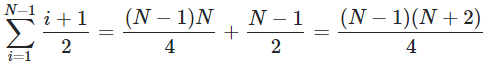

y en el peor de los casos deberiese ser:                                                                                                          
                                                                                              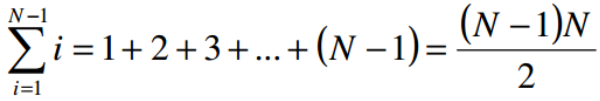

Ambas formulas demostrando que la complejidad temporal es $O(n^2)$.

#5. Experimentos

Ahora realizaremos un numero de experimentos que nos ayudaran a visualizar la eficacia del insertion sort en ciertos aspectos.

##5.1. Numero de comparaciones

En este experimento se comprobara el numero de comparaciones que el insertion sort realiza poder ordenar una lista en su totailidad.

Para ello se hizo una grafica que muestra.

* la cantidad de comparaciones del peor caso calculadas matemáticamente,
* la cantidad de comparaciones del mejor caso calculadas matemáticamente (n-1 comparaciones si el arreglo está ordenado)
* la cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para un problema que tiene un tamaño $n \in [5,20]$

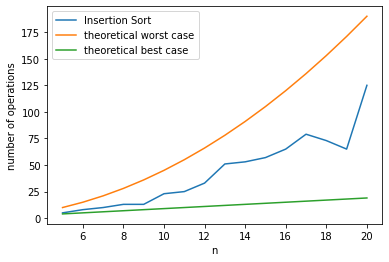

In [ ]:
import matplotlib.pyplot as plt
import random

x=[n for n in range(5,21)] 
y1=[n*(n-1)/2 for n in range(5,21)] # worst case
y2=[n-1 for n in range(5,21)] # best case
y=[]; 

for n in range(5,21):
  a = random.sample(range(1, 100), n)
  a,counter = insertionSort(a,verbose = False)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Insertion Sort", "theoretical worst case", "theoretical best case"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

###Analisis de resultados

Como se puede apreciar en el grafico, el numero de comparaciones empirico cumple la expectativa, de realizar menos comparaciones que el peor caso pero mas que el mejor caso.

De hecho el tiempo empirico esta bastante cercano a lo que seria la mediana de ambas proyecciones. 


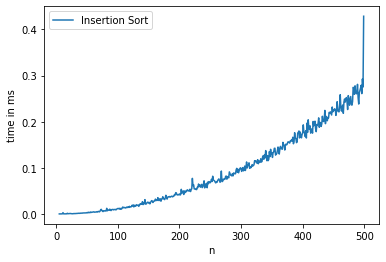

In [70]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  verbose = False

  #la función repeat está ejecutando 20 veces insertion_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({a},{verbose})", repeat=1, number=10)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["Insertion Sort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

###Analisis de resultados

Como era de esperarse el crecimiento temporal del algoritmo cumple con el tiempo de ejecucion teorico $O(n^2)$, como se puede ver en la grafica, tambien como era de esperarse existen algunos valles y picos en el tiempo de comparacion de ejecucion.

